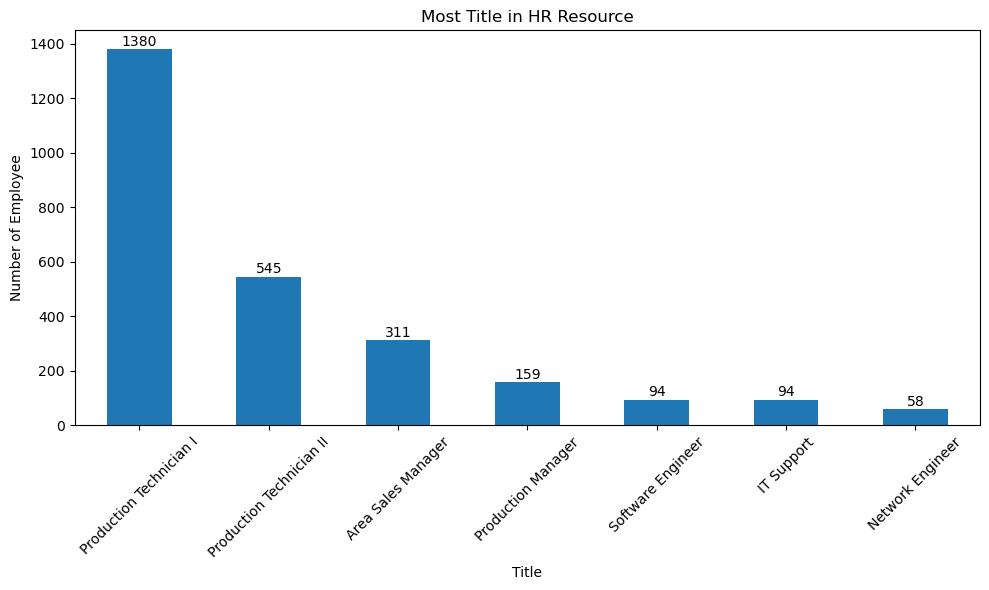

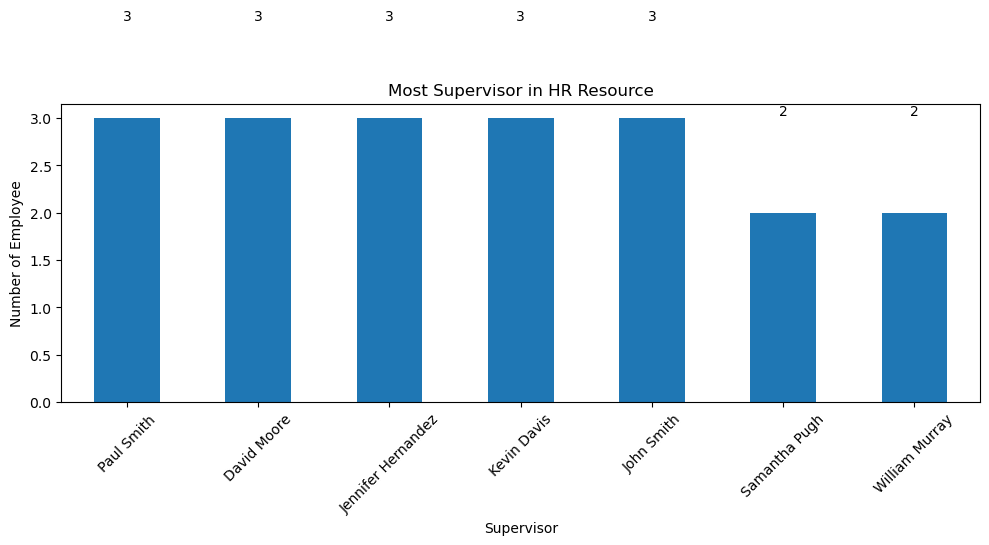

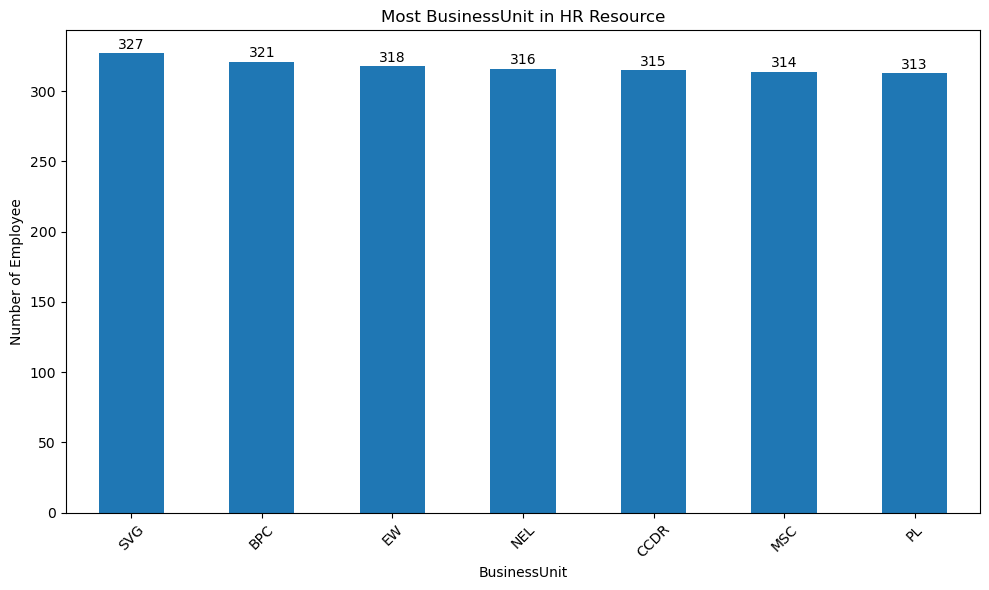

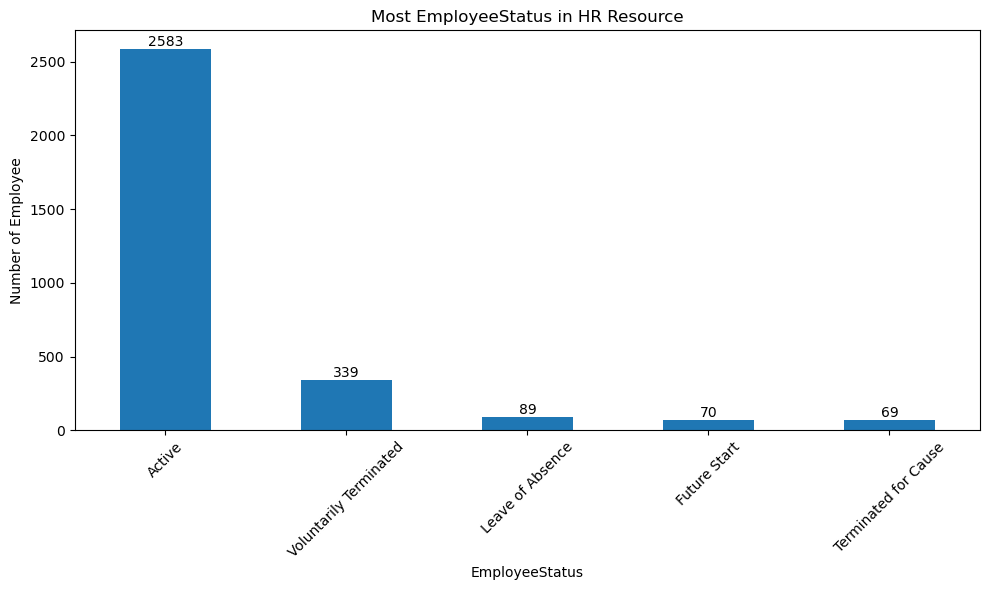

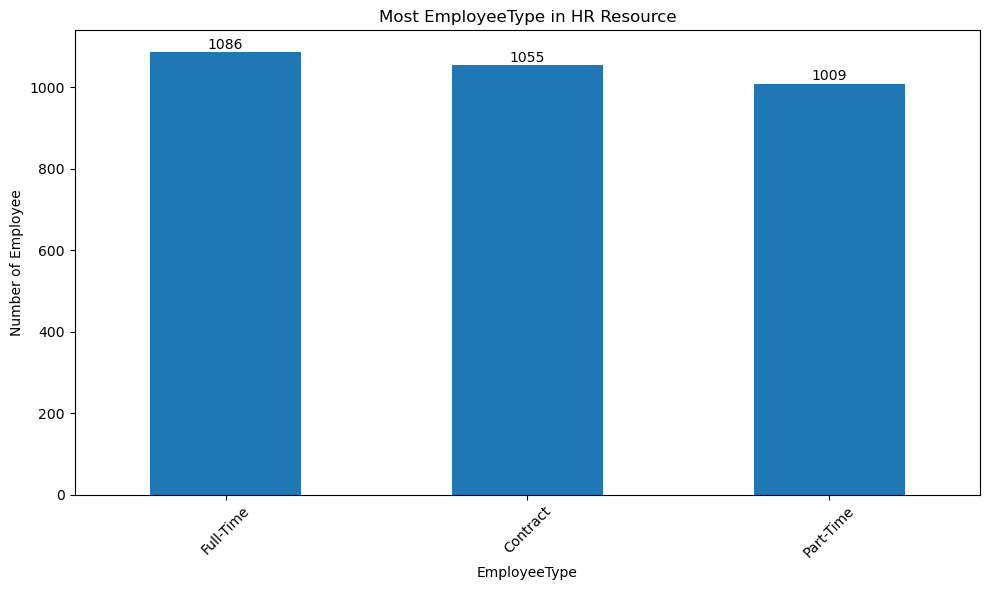

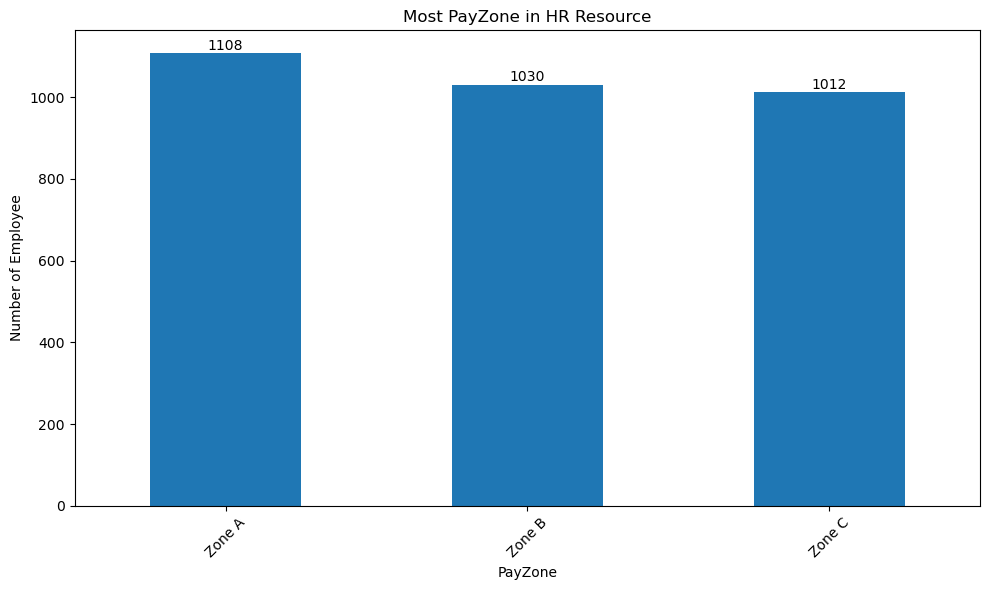

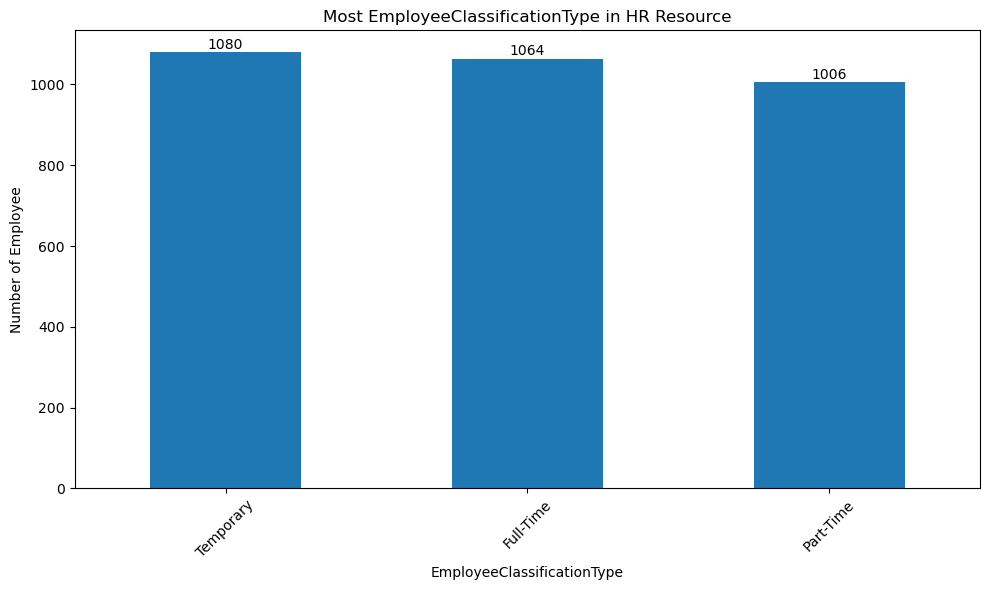

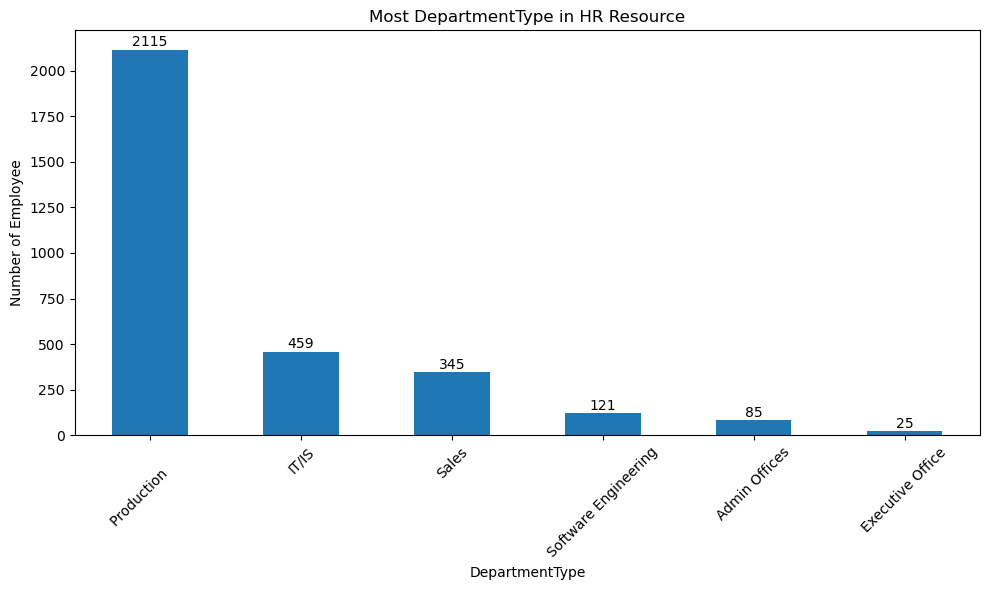

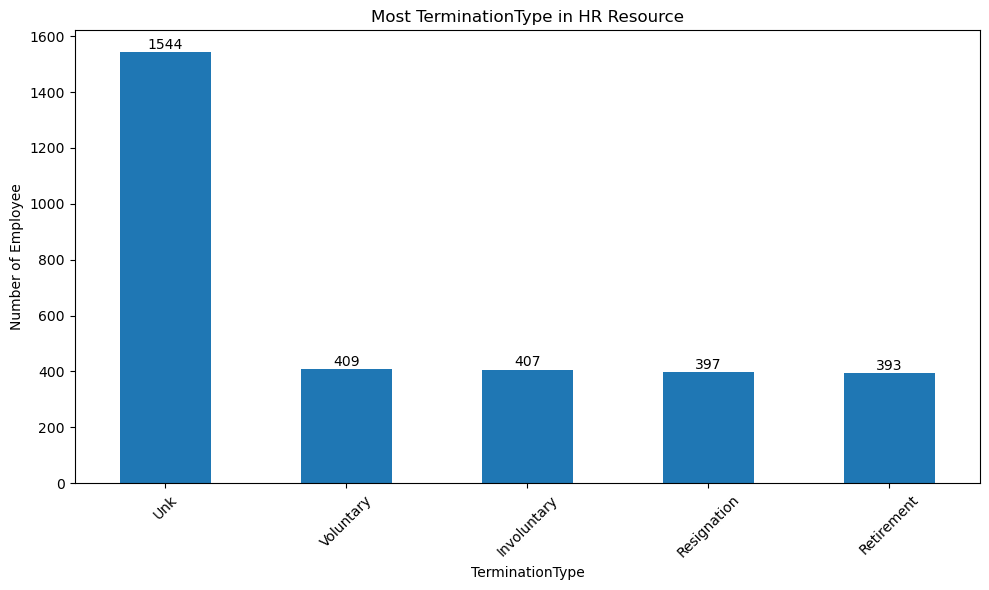

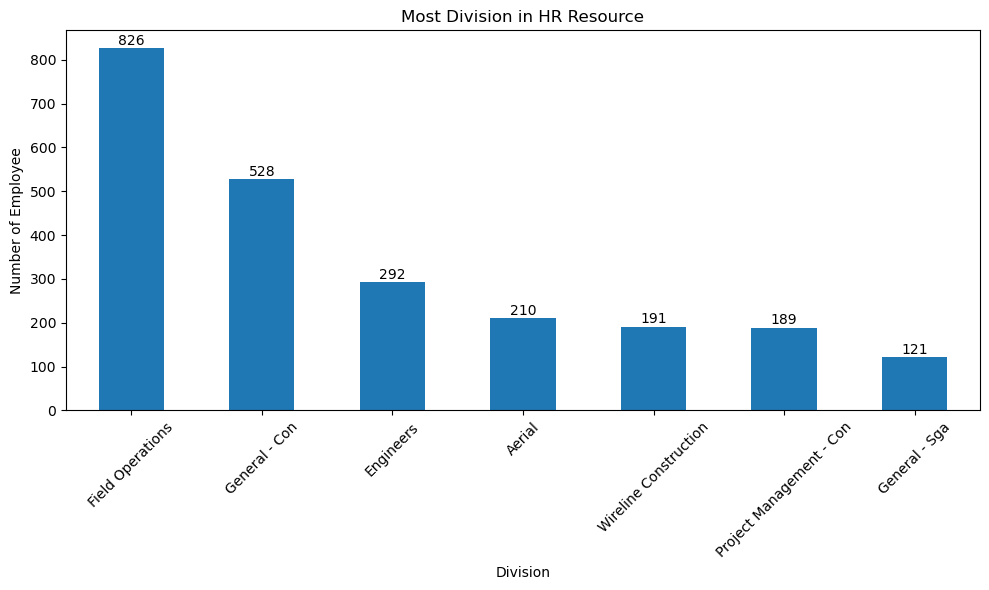

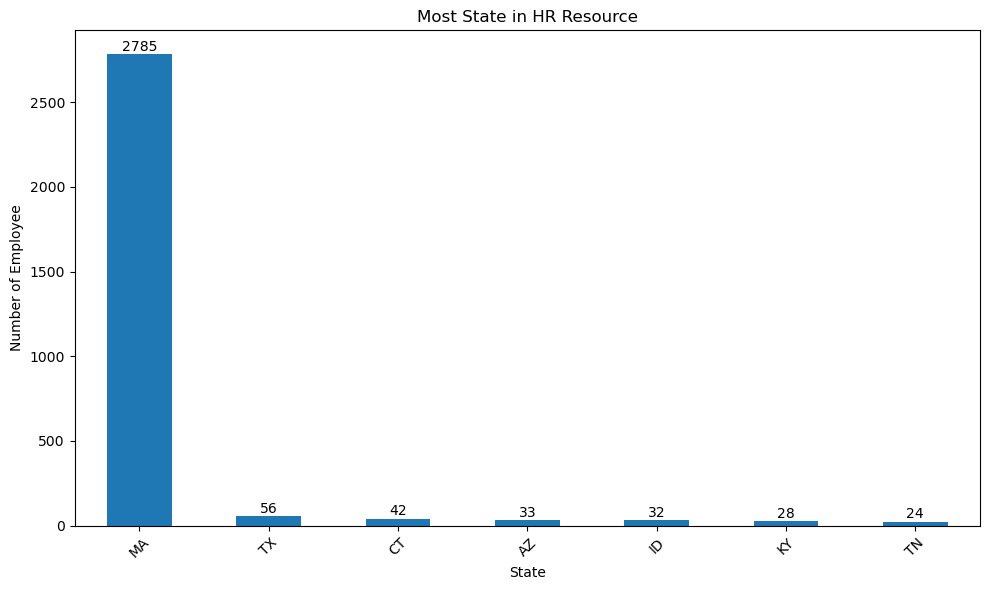

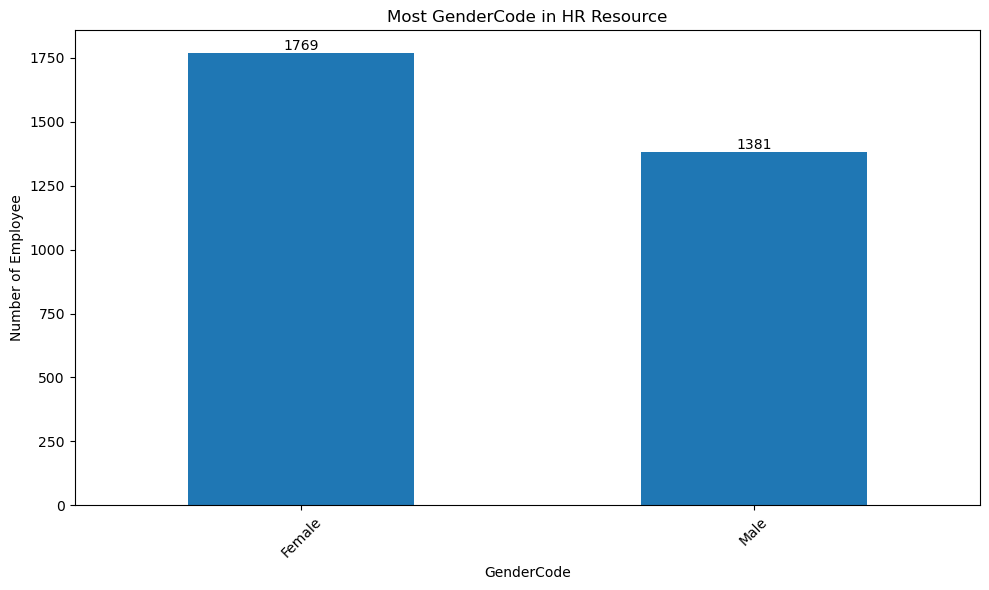

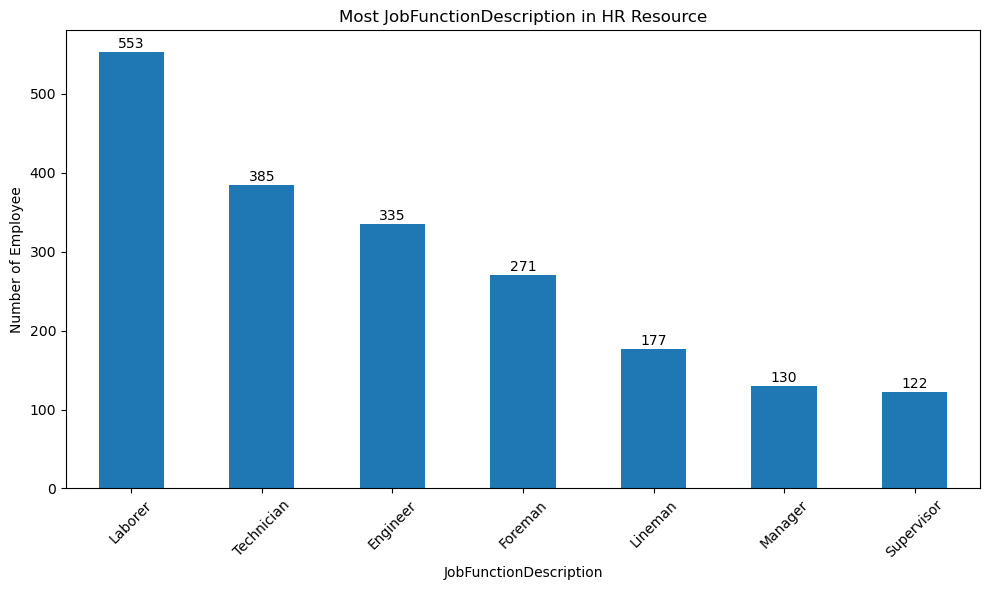

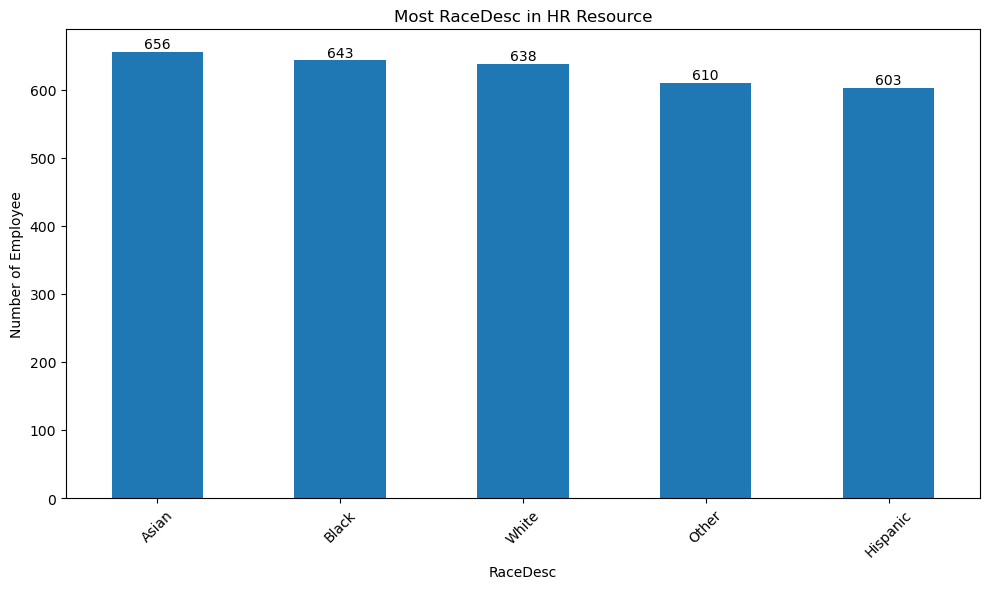

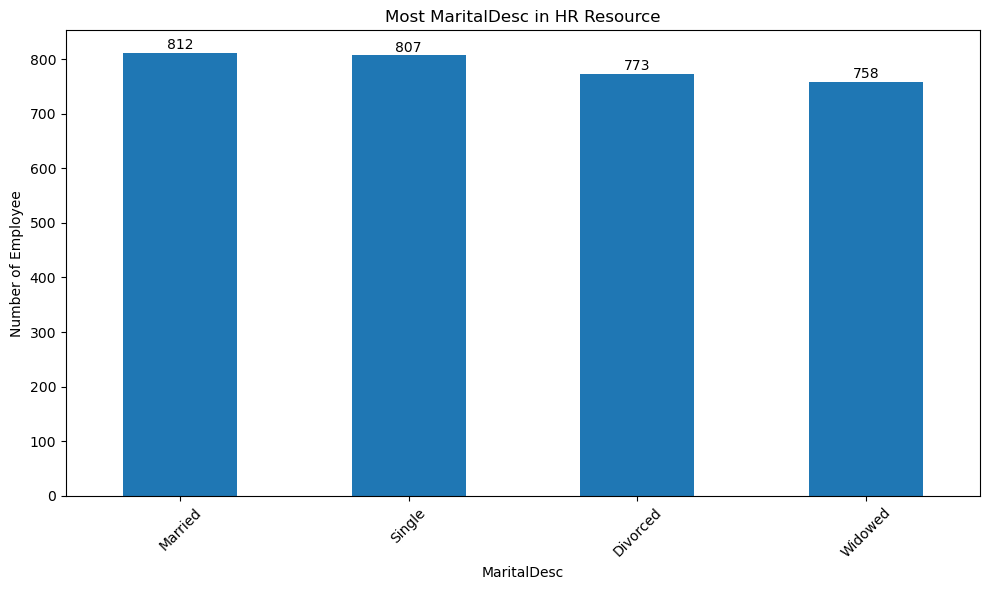

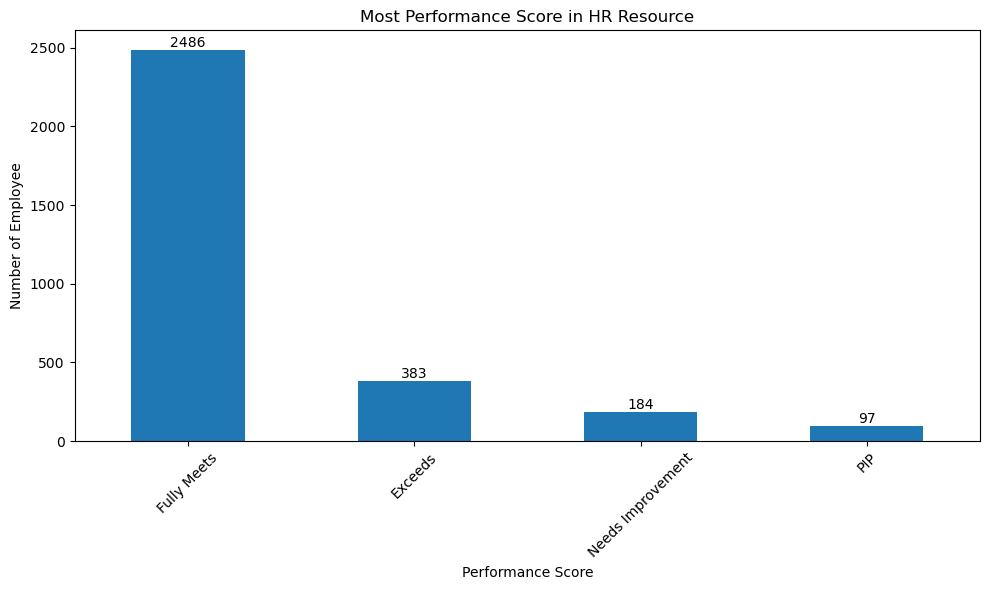

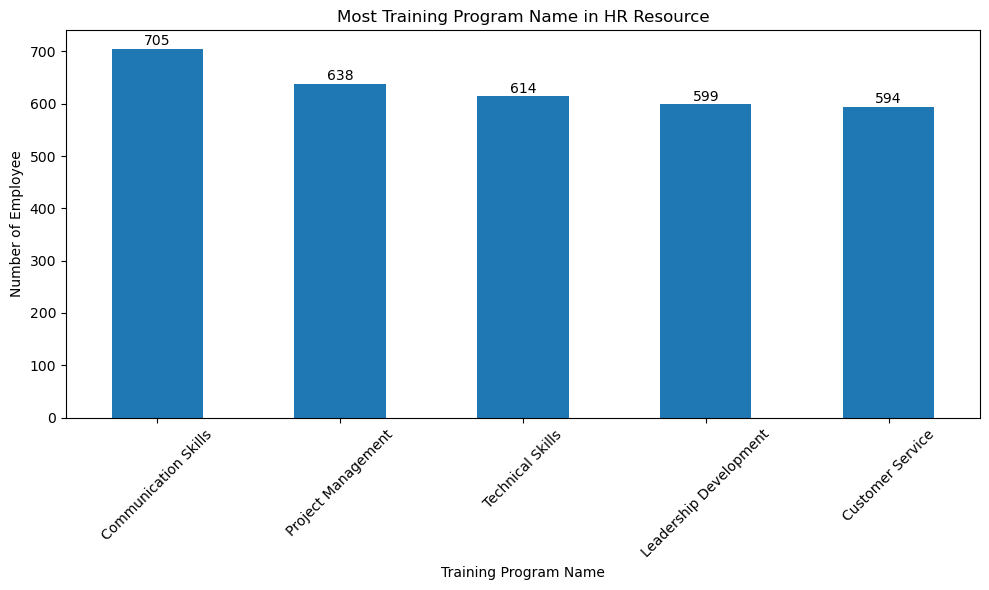

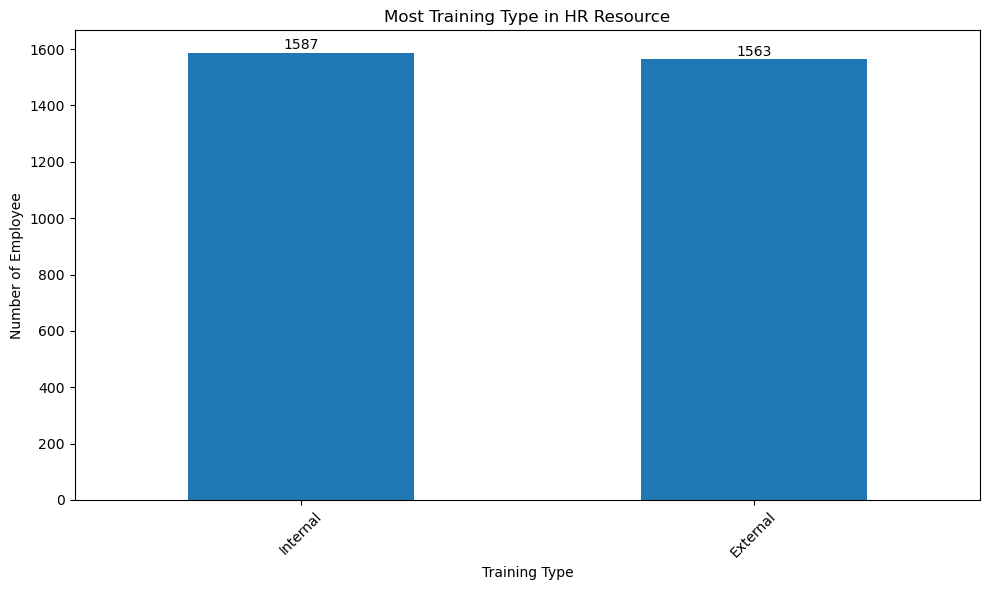

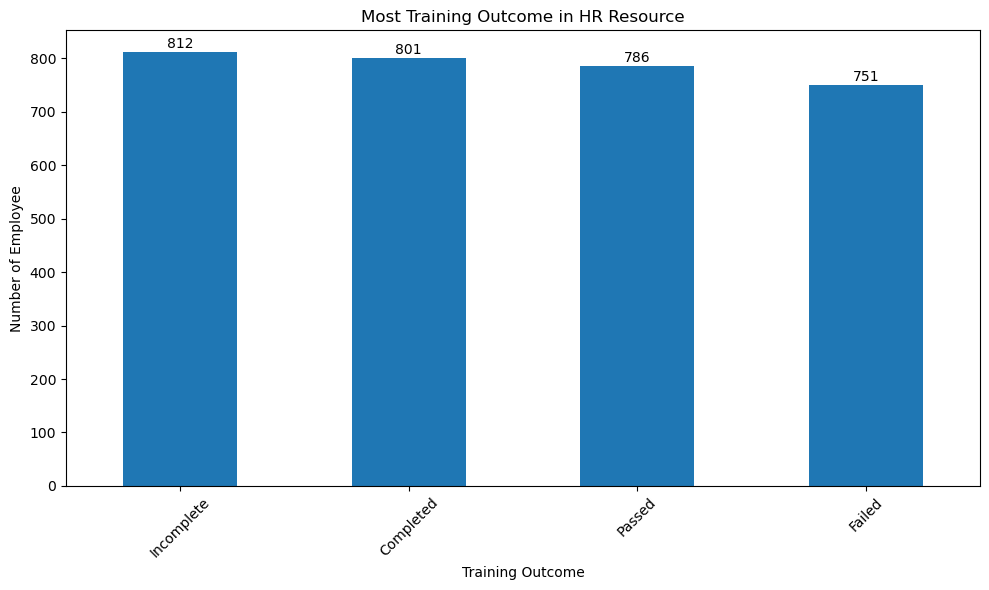

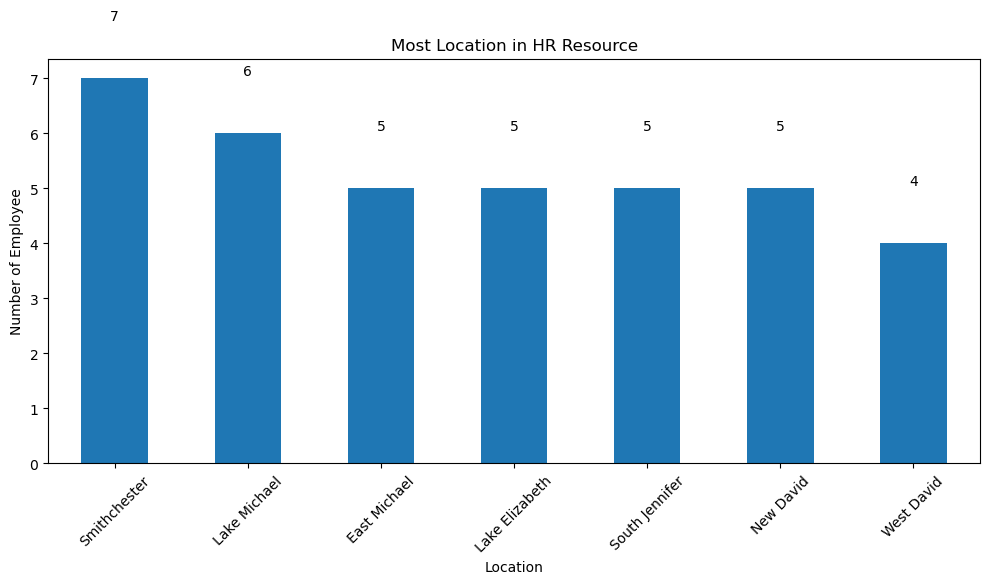

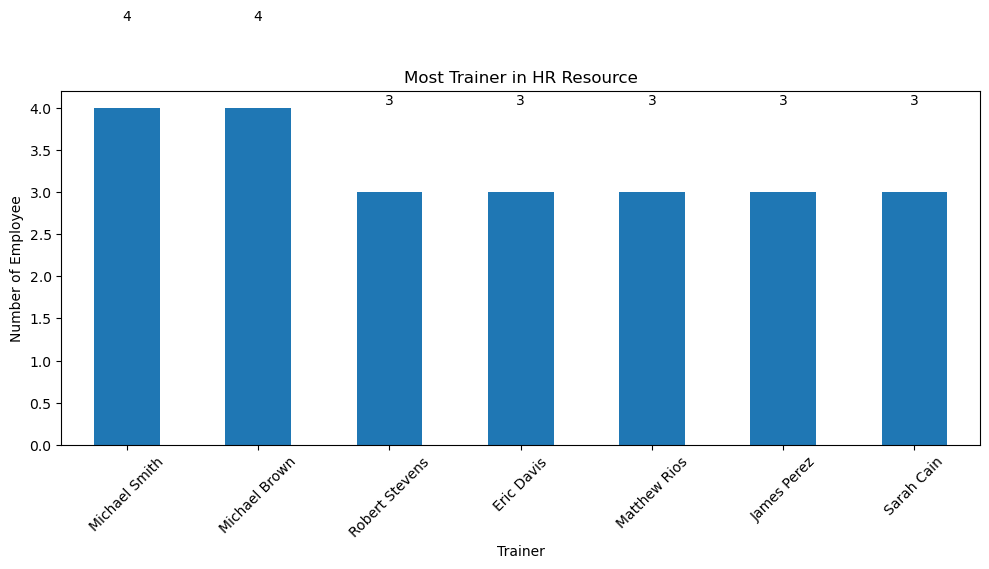

In [12]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Most Context for Bar Chart
df = pd.read_csv("Messy_HR_Dataset_Detailed.csv")

target_col = ['Title','Supervisor','BusinessUnit','EmployeeStatus','EmployeeType','PayZone','EmployeeClassificationType','DepartmentType',
              'TerminationType','Division','State','GenderCode','JobFunctionDescription','RaceDesc','MaritalDesc','Performance Score',
             'Training Program Name','Training Type','Training Outcome','Location','Trainer']
for dt in target_col:
    # Dataset
    top_context = df[dt].value_counts().head(7)
        
    # Bar Chart
    plt.figure(figsize=(10, 6))
    ax = top_context.plot(kind='bar')
    # Add label
    for i, value in enumerate(top_context):
        plt.text(i, value + 1, str(value), ha='center', va='bottom')
    plt.title(f"Most {dt} in HR Resource")
    plt.xlabel(dt)
    plt.ylabel("Number of Employee")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

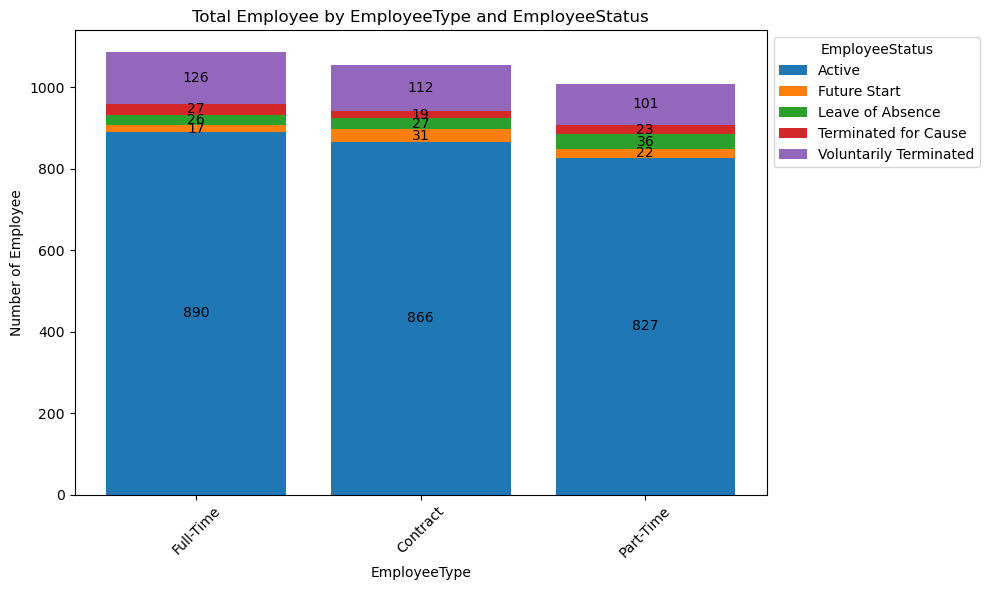

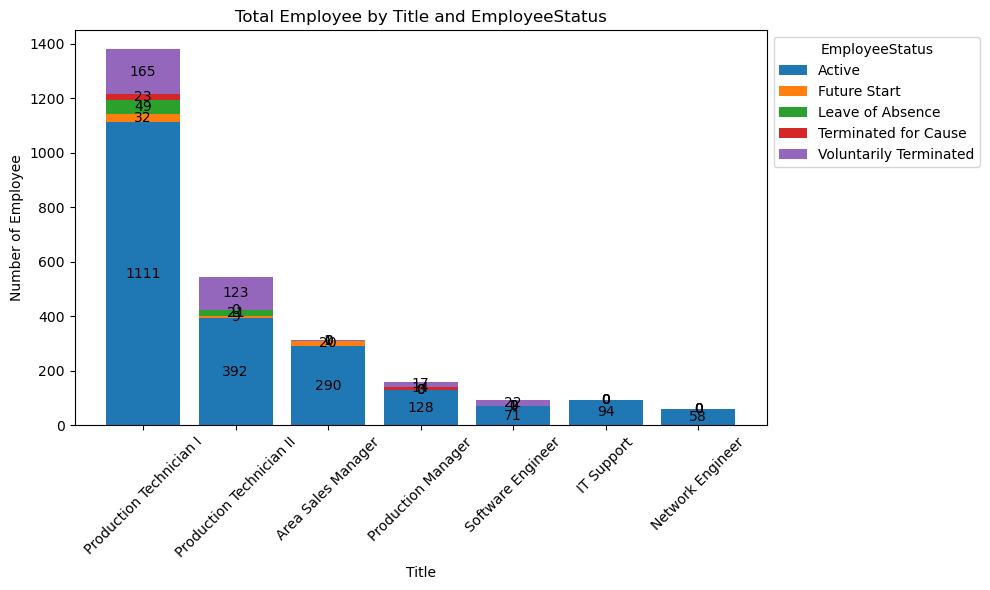

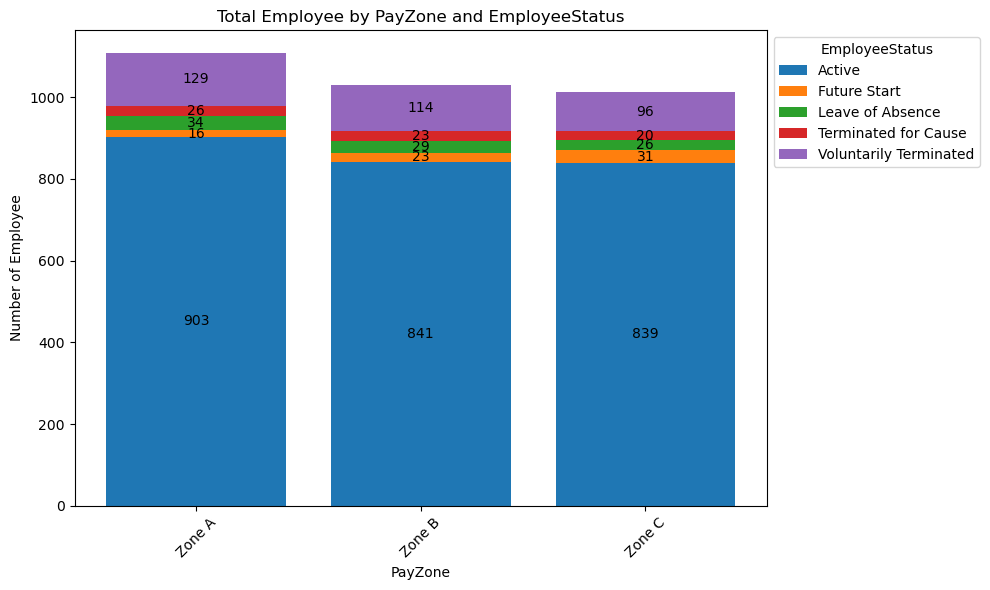

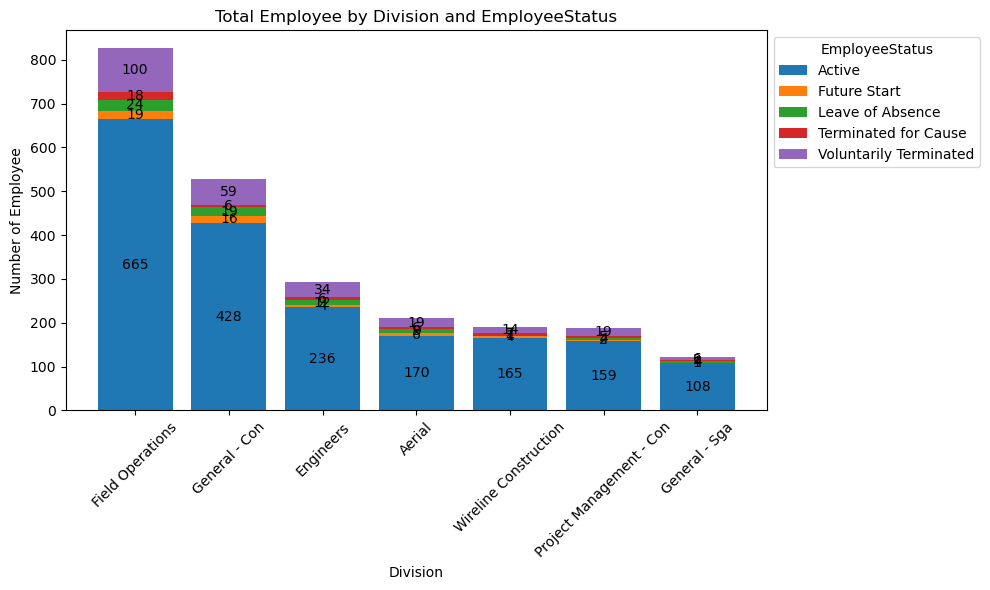

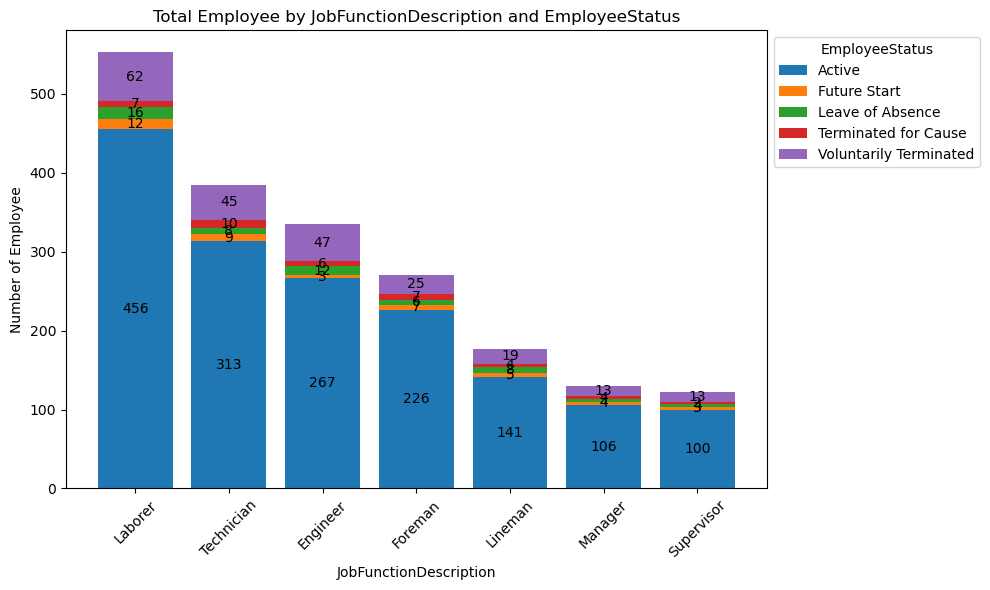

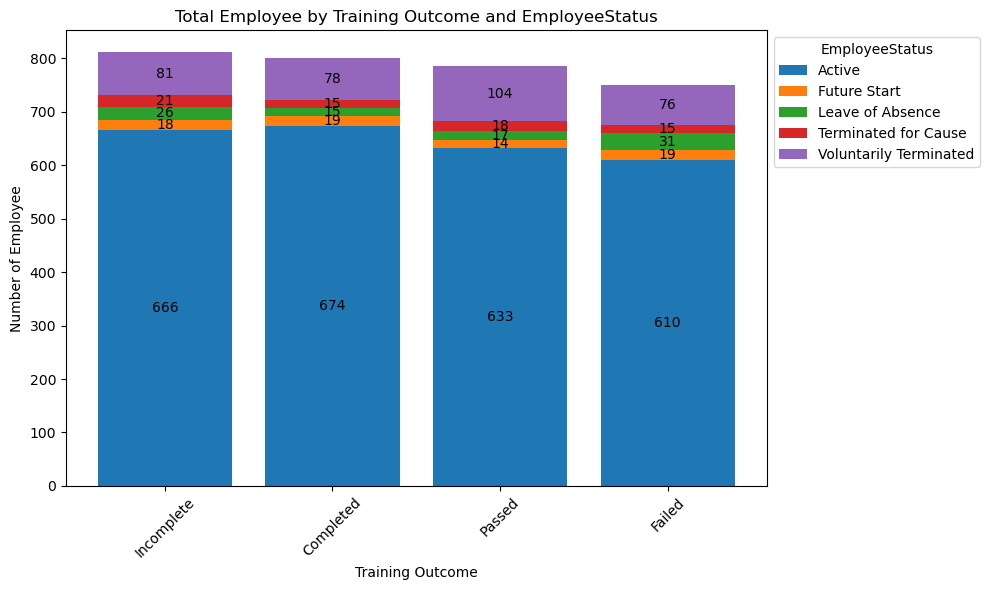

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Messy_HR_Dataset_Detailed.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping for Nonconditional Data
target_col = [
    { 'count_col' : 'EmployeeType', 'group_col' : 'EmployeeStatus' },
    { 'count_col' : 'Title', 'group_col' : 'EmployeeStatus' },
    { 'count_col' : 'PayZone', 'group_col' : 'EmployeeStatus' },
    { 'count_col' : 'Division', 'group_col' : 'EmployeeStatus' },
    { 'count_col' : 'JobFunctionDescription', 'group_col' : 'EmployeeStatus' },
    { 'count_col' : 'Training Outcome', 'group_col' : 'EmployeeStatus' },
]

for dt in target_col:
    count_col = dt['count_col']
    group_col = dt['group_col']
    
    # Dataset
    context_group_counts = df.groupby([count_col, group_col]).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index=count_col, columns=group_col, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Customizing the plot
    ax.set_title(f'Total Employee by {count_col} and {group_col}')
    ax.set_xlabel(count_col)
    ax.set_ylabel('Number of Employee')
    ax.legend(title=group_col, bbox_to_anchor=(1, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

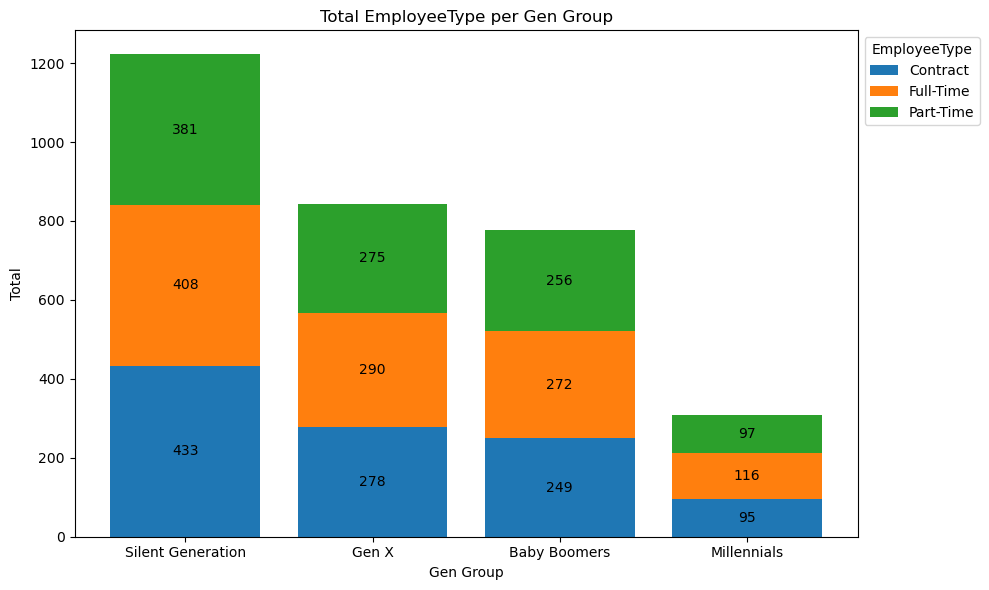

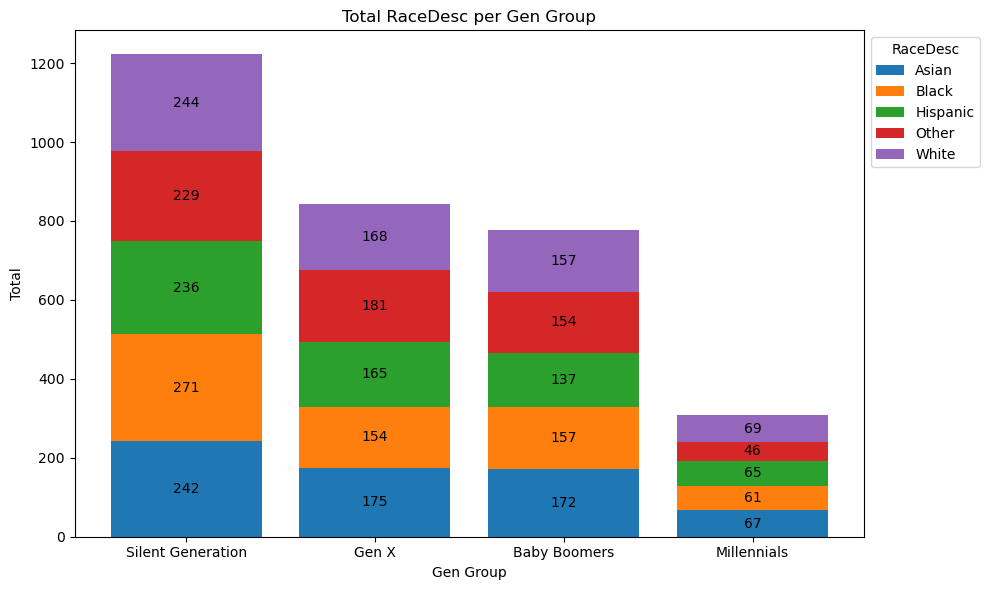

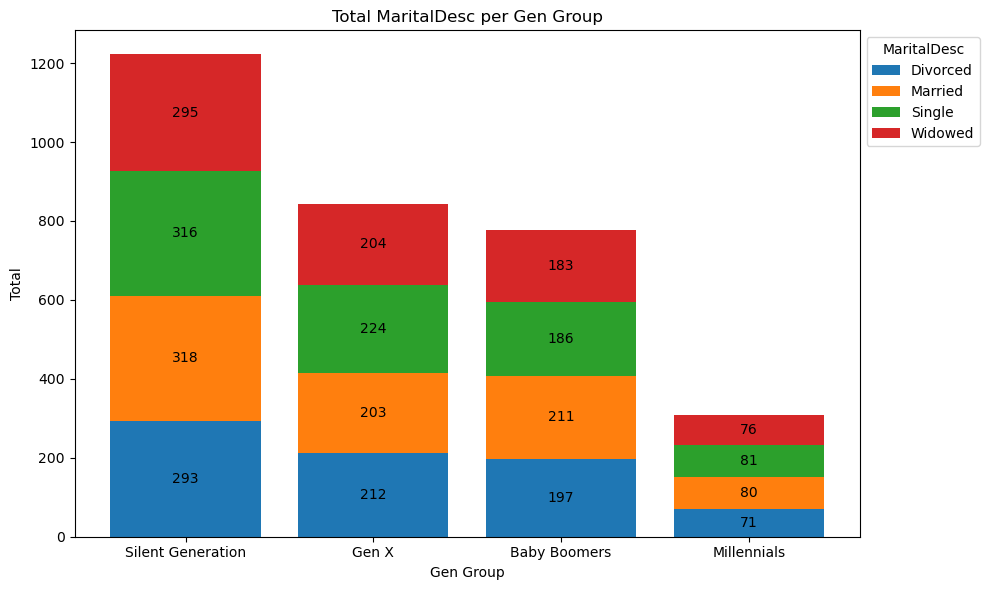

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Messy_HR_Dataset_Detailed.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Total Employee Context per Gen Group
# Dataset Convert DOB column to datetime
df['DOB'] = pd.to_datetime(df['DOB'], format='%d-%m-%Y')

# Calculate age from DOB
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['DOB'].dt.year

# Categorize into Gen Group based on generational years
df['Gen Group'] = pd.cut(
    df['Age'], 
    bins=[13, 29, 45, 61, 100], 
    labels=['Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']
)

target_col = ['EmployeeType','RaceDesc','MaritalDesc']

for dt in target_col:
    context_group_counts = df.groupby(['Gen Group', dt], observed=False).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index='Gen Group', columns=dt, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Bar Chart
    ax.set_title(f'Total {dt} per Gen Group')
    ax.set_xlabel('Gen Group')
    ax.set_ylabel('Total')
    ax.legend(title=dt, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

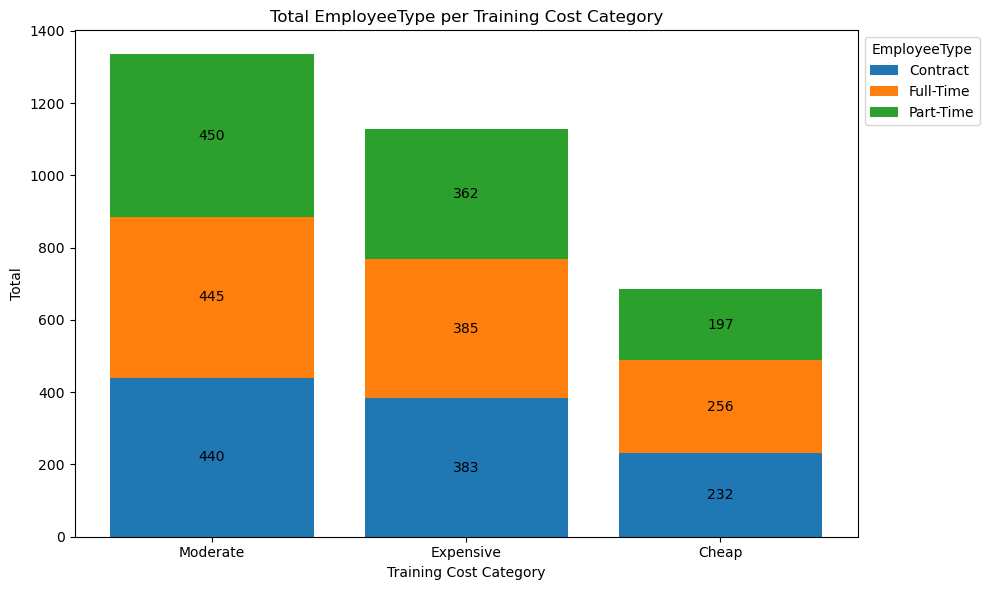

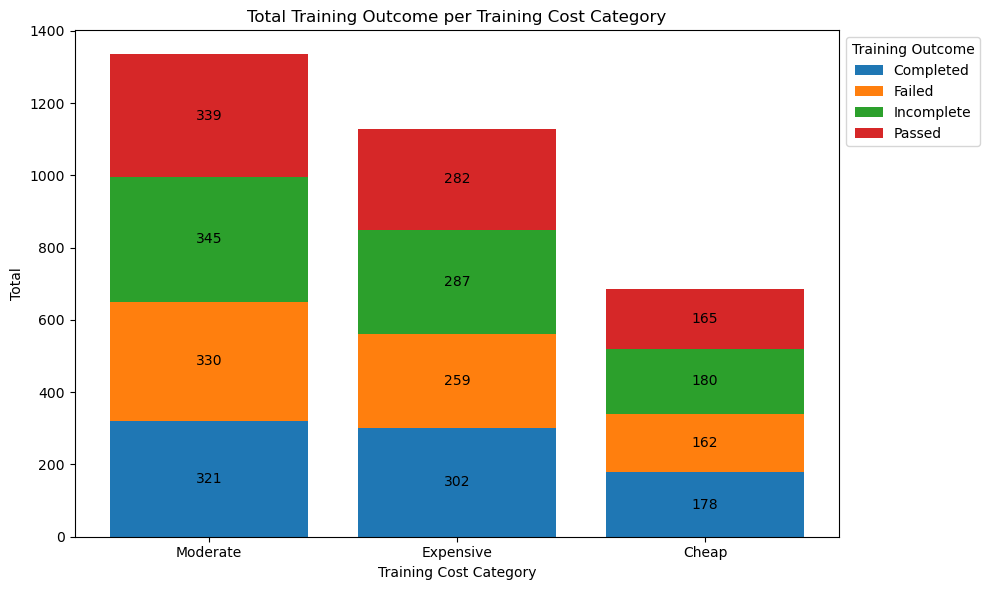

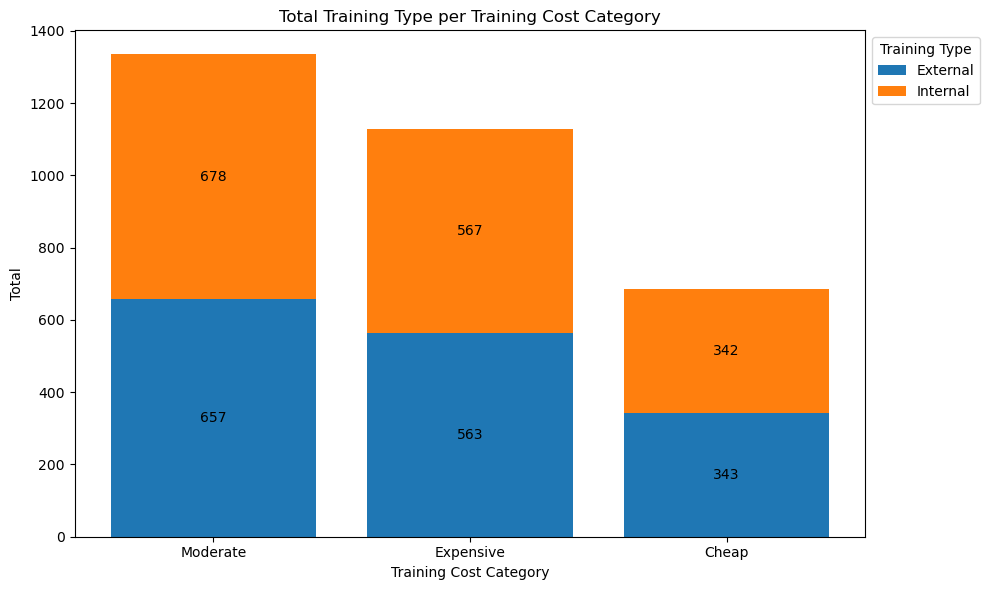

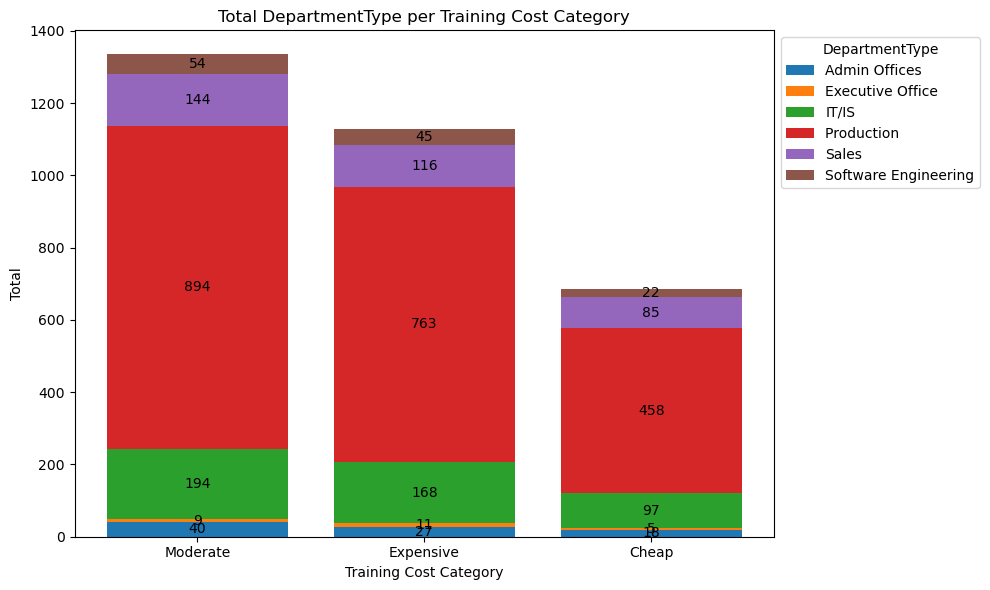

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Messy_HR_Dataset_Detailed.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Total Employee Context per Training Cost Category
# Categorize into Training Cost Category based on Training Cost
df['Training Cost Category'] = pd.cut(
    df['Training Cost'], 
    bins=[0, 300, 700, 1000], 
    labels=['Cheap', 'Moderate', 'Expensive']
)

target_col = ['EmployeeType','Training Outcome','Training Type','DepartmentType']

for dt in target_col:
    context_group_counts = df.groupby(['Training Cost Category', dt], observed=False).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index='Training Cost Category', columns=dt, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Bar Chart
    ax.set_title(f'Total {dt} per Training Cost Category')
    ax.set_xlabel('Training Cost Category')
    ax.set_ylabel('Total')
    ax.legend(title=dt, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()